# Step 1: Import Libraries

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.regularizers import l1, l2
import matplotlib.pyplot as plt


# Step 2: Load and Preprocess Data

In [3]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data
x_train = x_train / 255.0
x_test = x_test / 255.0

# Flatten images for fully connected layers
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

# One-hot encode labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


# Step 3: Build Models

## Model Without Regularization

In [4]:
model_no_reg = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])
model_no_reg.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


C:\Users\deepa\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Model With L2 Regularization

In [5]:
model_l2 = Sequential([
    Dense(128, activation='relu', kernel_regularizer=l2(0.01), input_shape=(784,)),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(10, activation='softmax')
])
model_l2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


## Model With Dropout

In [6]:
model_dropout = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])
model_dropout.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# Step 4: Train Models

In [7]:
history_no_reg = model_no_reg.fit(x_train, y_train, epochs=10, validation_split=0.2, batch_size=128)
history_l2 = model_l2.fit(x_train, y_train, epochs=10, validation_split=0.2, batch_size=128)
history_dropout = model_dropout.fit(x_train, y_train, epochs=10, validation_split=0.2, batch_size=128)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8102 - loss: 0.6654 - val_accuracy: 0.9494 - val_loss: 0.1827
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9535 - loss: 0.1636 - val_accuracy: 0.9621 - val_loss: 0.1313
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9698 - loss: 0.1045 - val_accuracy: 0.9678 - val_loss: 0.1097
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9769 - loss: 0.0771 - val_accuracy: 0.9657 - val_loss: 0.1107
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9821 - loss: 0.0610 - val_accuracy: 0.9708 - val_loss: 0.0991
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9853 - loss: 0.0489 - val_accuracy: 0.9711 - val_loss: 0.0924
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9893 - loss: 0.0371 - val_accuracy: 0.9728 - val_loss: 0.0936
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9909 - loss: 0.0312 - val_accuracy: 0.

# Graphs

## Validation Accuracy Over Epochs

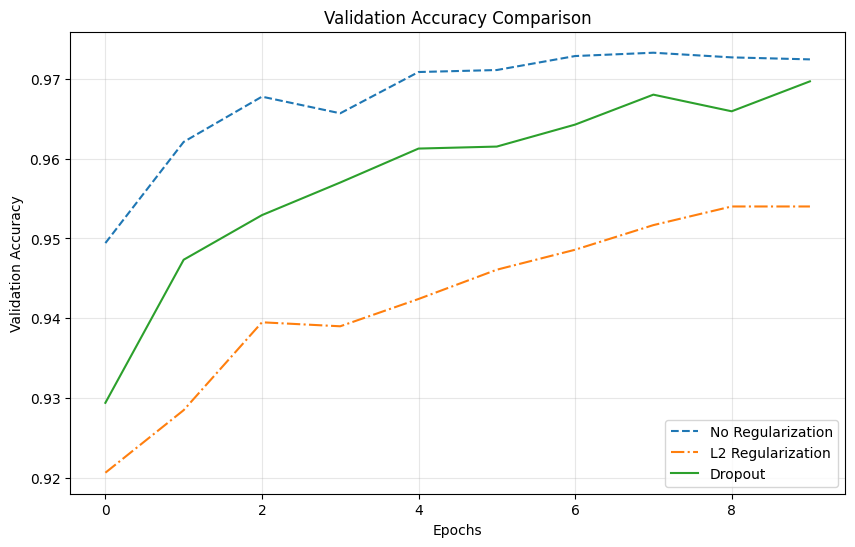

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(history_no_reg.history['val_accuracy'], label='No Regularization', linestyle='--')
plt.plot(history_l2.history['val_accuracy'], label='L2 Regularization', linestyle='-.')
plt.plot(history_dropout.history['val_accuracy'], label='Dropout', linestyle='-')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy Comparison')
plt.legend()
plt.grid(alpha=0.3)
plt.show()
